In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Growing season effective precipitation

In [6]:
# loading data
df_GS = pd.read_csv('../../Data_main/results_eval/peff/grow_season/all_basins.csv')
df_month = pd.read_csv('../../Data_main/results_eval/peff/monthly/all_basins.csv')

In [7]:
# melting the dataframe so that effective precip and precip are in the same column
df_GS_melt = df.melt(id_vars='basin_name', value_vars=['peff', 'precip'], var_name='variable', value_name='value')
df_GS_melt.head()

,basin_name,variable,value
0,"GMD4, KS",peff,432.95200
1,"GMD4, KS",peff,437.41577
2,"GMD4, KS",peff,432.38794
3,"GMD4, KS",peff,426.84190
4,"GMD4, KS",peff,454.76538


In [39]:
basin_names = ['GMD4, KS', 'GMD3, KS', 'Republican Basin, CO',
               'Harquahala INA, AZ', 'Douglas AMA, AZ',
               'Diamond Valley, NV', 'Central Valley, CA']

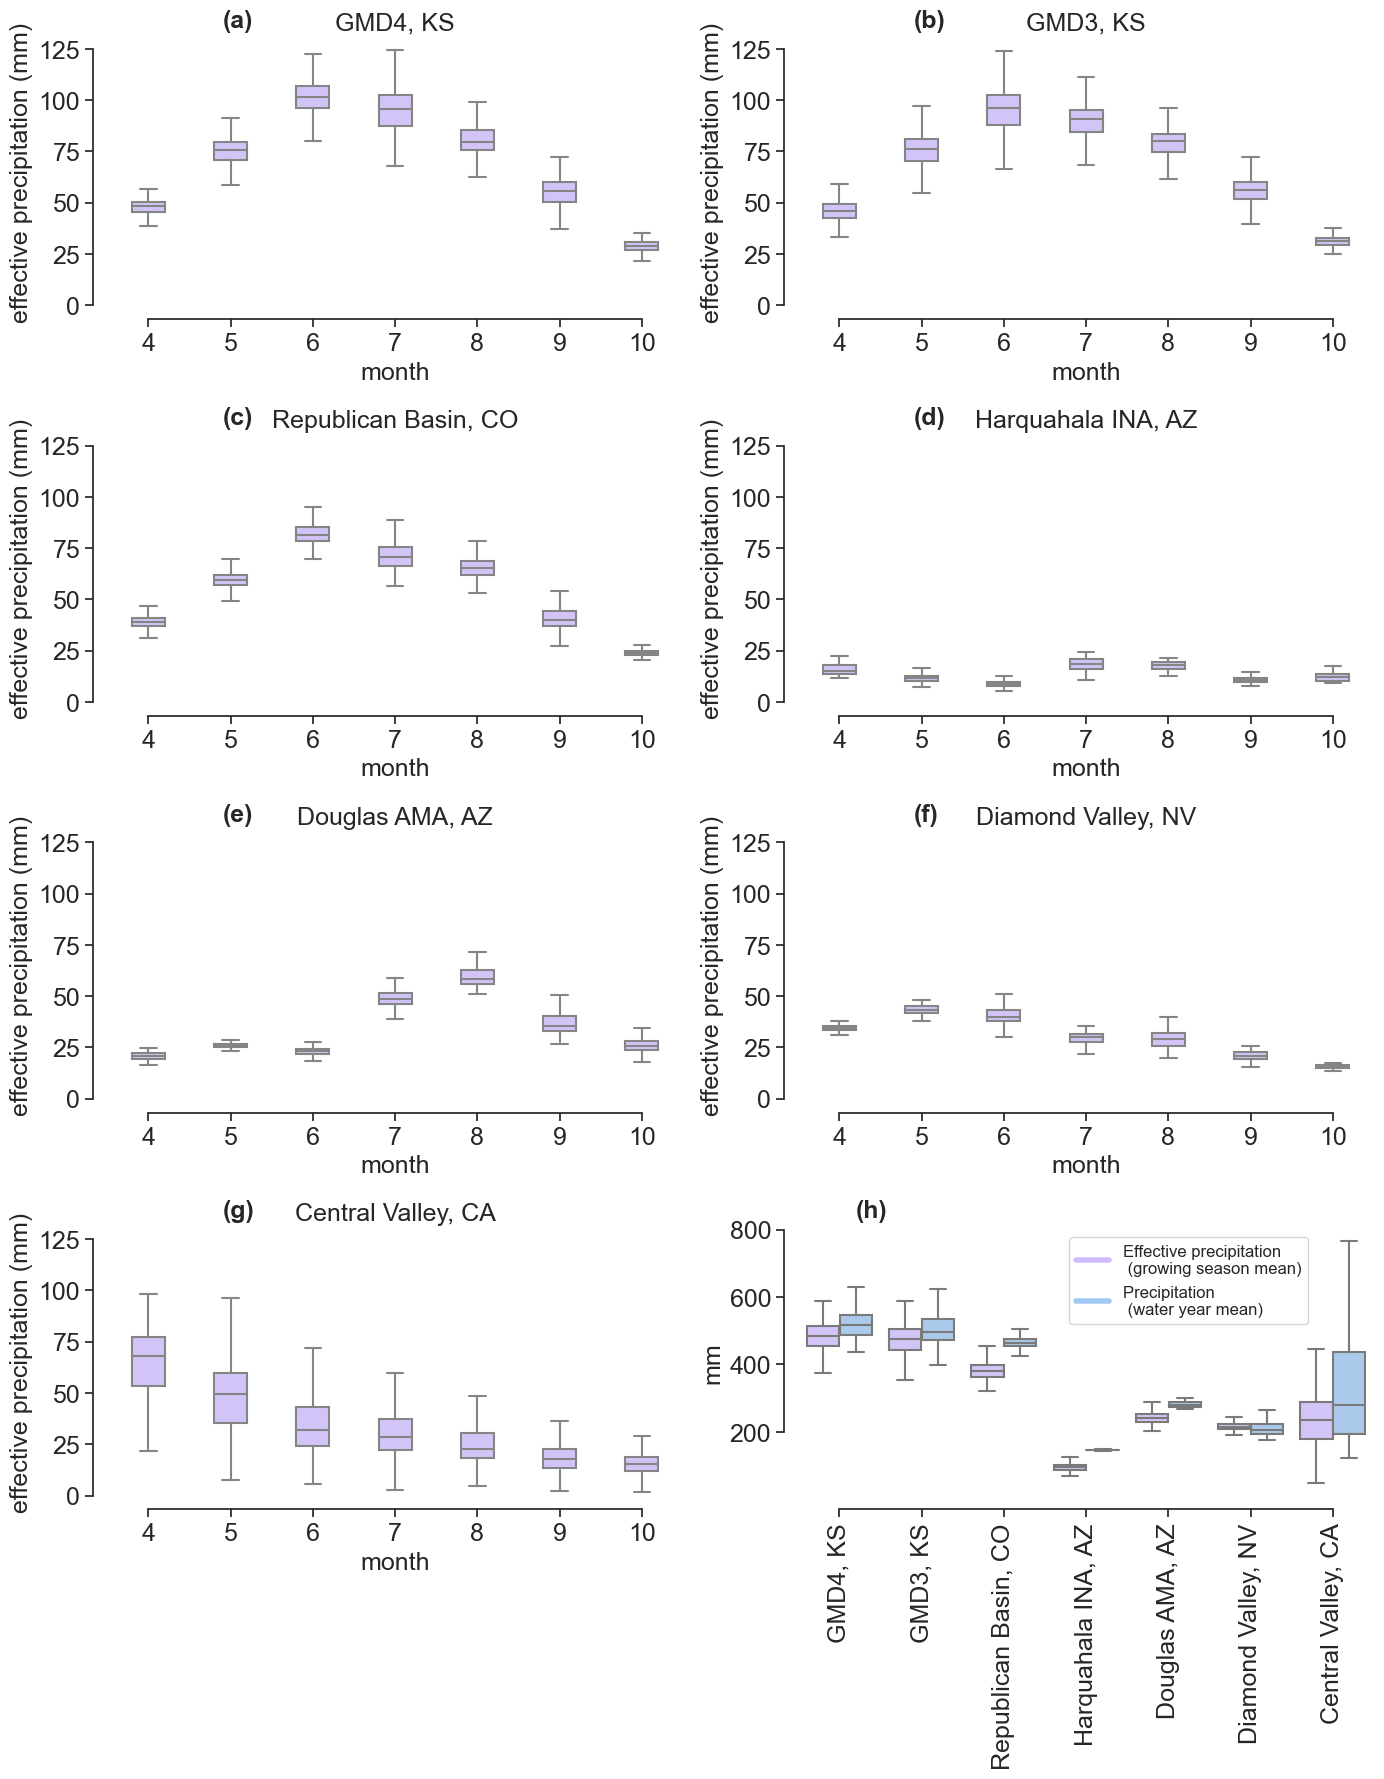

In [79]:
# plotting
col = 2
row = 4
fig, ax = plt.subplots(row, col, figsize=(14, 18))

# setting some properties for the plot
plt.rcParams['font.size'] = '18'
sns.set_theme(style="ticks", palette="pastel")

# Subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

# plotting
basin_idx = 0 # starting an index to loop for each subplot

for r in range(row):
    for c in range(col):
        if (r==3) & (c==1):  # for peff and precip growing season group plot
            # # plot 1
            # color and basin order
            colors = {'peff': 'm', 'precip': 'b'}
            basin_order = ['GMD4, KS', 'GMD3, KS', 'Republican Basin, CO',
                              'Harquahala INA, AZ', 'Douglas AMA, AZ',
                              'Diamond Valley, NV', 'Central Valley, CA']
            
            sns.boxplot(x=df_GS_melt['basin_name'], y=df_GS_melt['value'], hue=df_GS_melt['variable'], 
                        ax=ax[r, c], order=basin_order, palette=colors, width=0.8, showfliers=False)
            
            ax[r, c].set_xlabel(None)
            ax[r, c].set_ylabel('mm', fontsize=18)
            ax[r, c].set_xticklabels(basin_order, rotation=90)
            ax[r, c].tick_params(axis='both', labelsize=18)
            ax[r, c].text(0.1, 1.11, subplot_labels[-1], transform=ax[r, c].transAxes, 
                          fontsize=18, fontweight='bold', va='top', ha='left')
            
            # custom legend
            handles = [plt.Line2D([0], [0], color='m', lw=4),
                       plt.Line2D([0], [0], color='b', lw=4)]
            labels = ['Effective precipitation \n (growing season mean)', 'Precipitation \n (water year mean)']
            ax[r, c].legend(handles, labels, fontsize=12, loc='upper right', bbox_to_anchor=(0.9, 1))
        
        else:  # for monthly peff plot of each basin
            df_plot = df_month[df_month['basin_name'] == basin_names[basin_idx]]
            
            sns.boxplot(x=df_plot['month'], y=df_plot['peff'], 
                        ax=ax[r, c], color='m', width=0.4, showfliers=False)
            
            ax[r, c].set_title(basin_names[basin_idx], fontsize=18)
            ax[r, c].set_xlabel('month', fontsize=18)
            ax[r, c].set_ylabel('effective precipitation (mm)', fontsize=18)
            ax[r, c].tick_params(axis='both', labelsize=18)
            ax[r, c].set_ylim([0, 130])

            # add subplot serial
            ax[r, c].text(0.2, 1.11, subplot_labels[basin_idx], transform=ax[r, c].transAxes, 
                          fontsize=18, fontweight='bold', va='top', ha='left')

            basin_idx += 1

# removing the boxes around the plot and only keeping the x and y axis
sns.despine(offset=10, trim=True)  

# adjusting subplot space


# Rotate x labels for plot 1 after tight layout
for label in ax[3, 1].get_xticklabels():
    label.set_rotation(90)
    
# Adjust bottom margin to prevent cutoff
plt.subplots_adjust(bottom=0.1)
plt.tight_layout()

fig.savefig('plots/peff_boxplot.png', dpi=300)